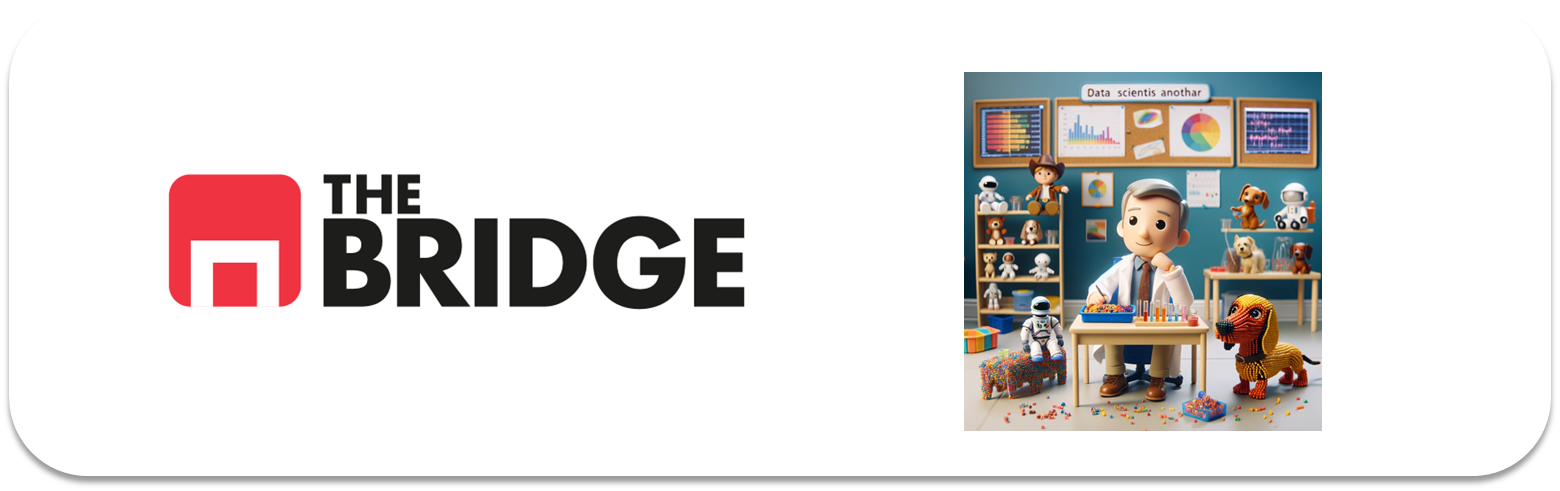

## Análisis de Datos: Frecuencias

### Preliminares

Antes de entrar en materia, ejecuta las celdas siguientes: [Por cierto vamos a emplear ya librerías de visualización pero ojo no para hacer presentación de datos sino para analizarlos, el uso de estas librerías con detalle lo veremos en el sprint, donde repasaremos su uso para análisis pero sobreto veremos el uso para crear visualizaciones que nos ayuden a presentar los resultados. Ahora simplemente quedate con que existen y con que podemos crear funciones potentes para usarlas]

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [2]:
categoricas_seguros = [ # Sí, conviene pasar la tabla a listas python :-)
    "state",
    "response",
    "coverage",
    "education",
    "employmentstatus",
    "gender",
    "location_code",
    "marital_status",
    "policy_type",
    "policy",
    "renew_offer_type",
    "sales_channel",
    "vehicle_class",
    "vehicle_size"
]


In [3]:

variables_categoricas_viajes = [
    "aircompany",
    "origen",
    "destino",
    "avion",
    "con_escala"
]


In [4]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



### Frecuencias absolutas
Siendo la moda el valor más común entre todos los posibles de la variable, también podemos sacar su **tabla de frecuencia absoluta**, que se define como el número de veces que se repite cada valor de la variable. Nosotros lo obtenemos con value_counts

#### Caso 1. Seguros: Frecuencias absolutas

In [5]:
for catego in categoricas_seguros:
    print(f"Para {catego}")
    print(df_seguros[catego].value_counts())
    print("\n*2")

Para state
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

*2
Para response
response
No     7826
Yes    1308
Name: count, dtype: int64

*2
Para coverage
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

*2
Para education
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

*2
Para employmentstatus
employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

*2
Para gender
gender
F    4658
M    4476
Name: count, dtype: int64

*2
Para location_code
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

*2
Para marital_status
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

*2

Así de primeras parece que las modas (salvo en el caso del género) son representativas, aunque haya casos donde haya cierta competencia. Esa dominancia podría ser ya algo a destacar (todo lo que sobresalga, recuerdas) sobre todo en el sentido de que quizás la empresa tenga un perfil excesivamente dominante, lo que pudiera ser buscado o no, pero sería algo a investigar. En cualquier caso ver tantas variables categóricas en números no es lo más cómodo para analizar así que...

#### Visualización

Las frecuencias es una de esas medidas, como todas las de distribución de datos, que más que leer es mejor visualizar para analizarlas. Así que empleemos esa función criptica del principio para visualizar nuestras frecuencias:

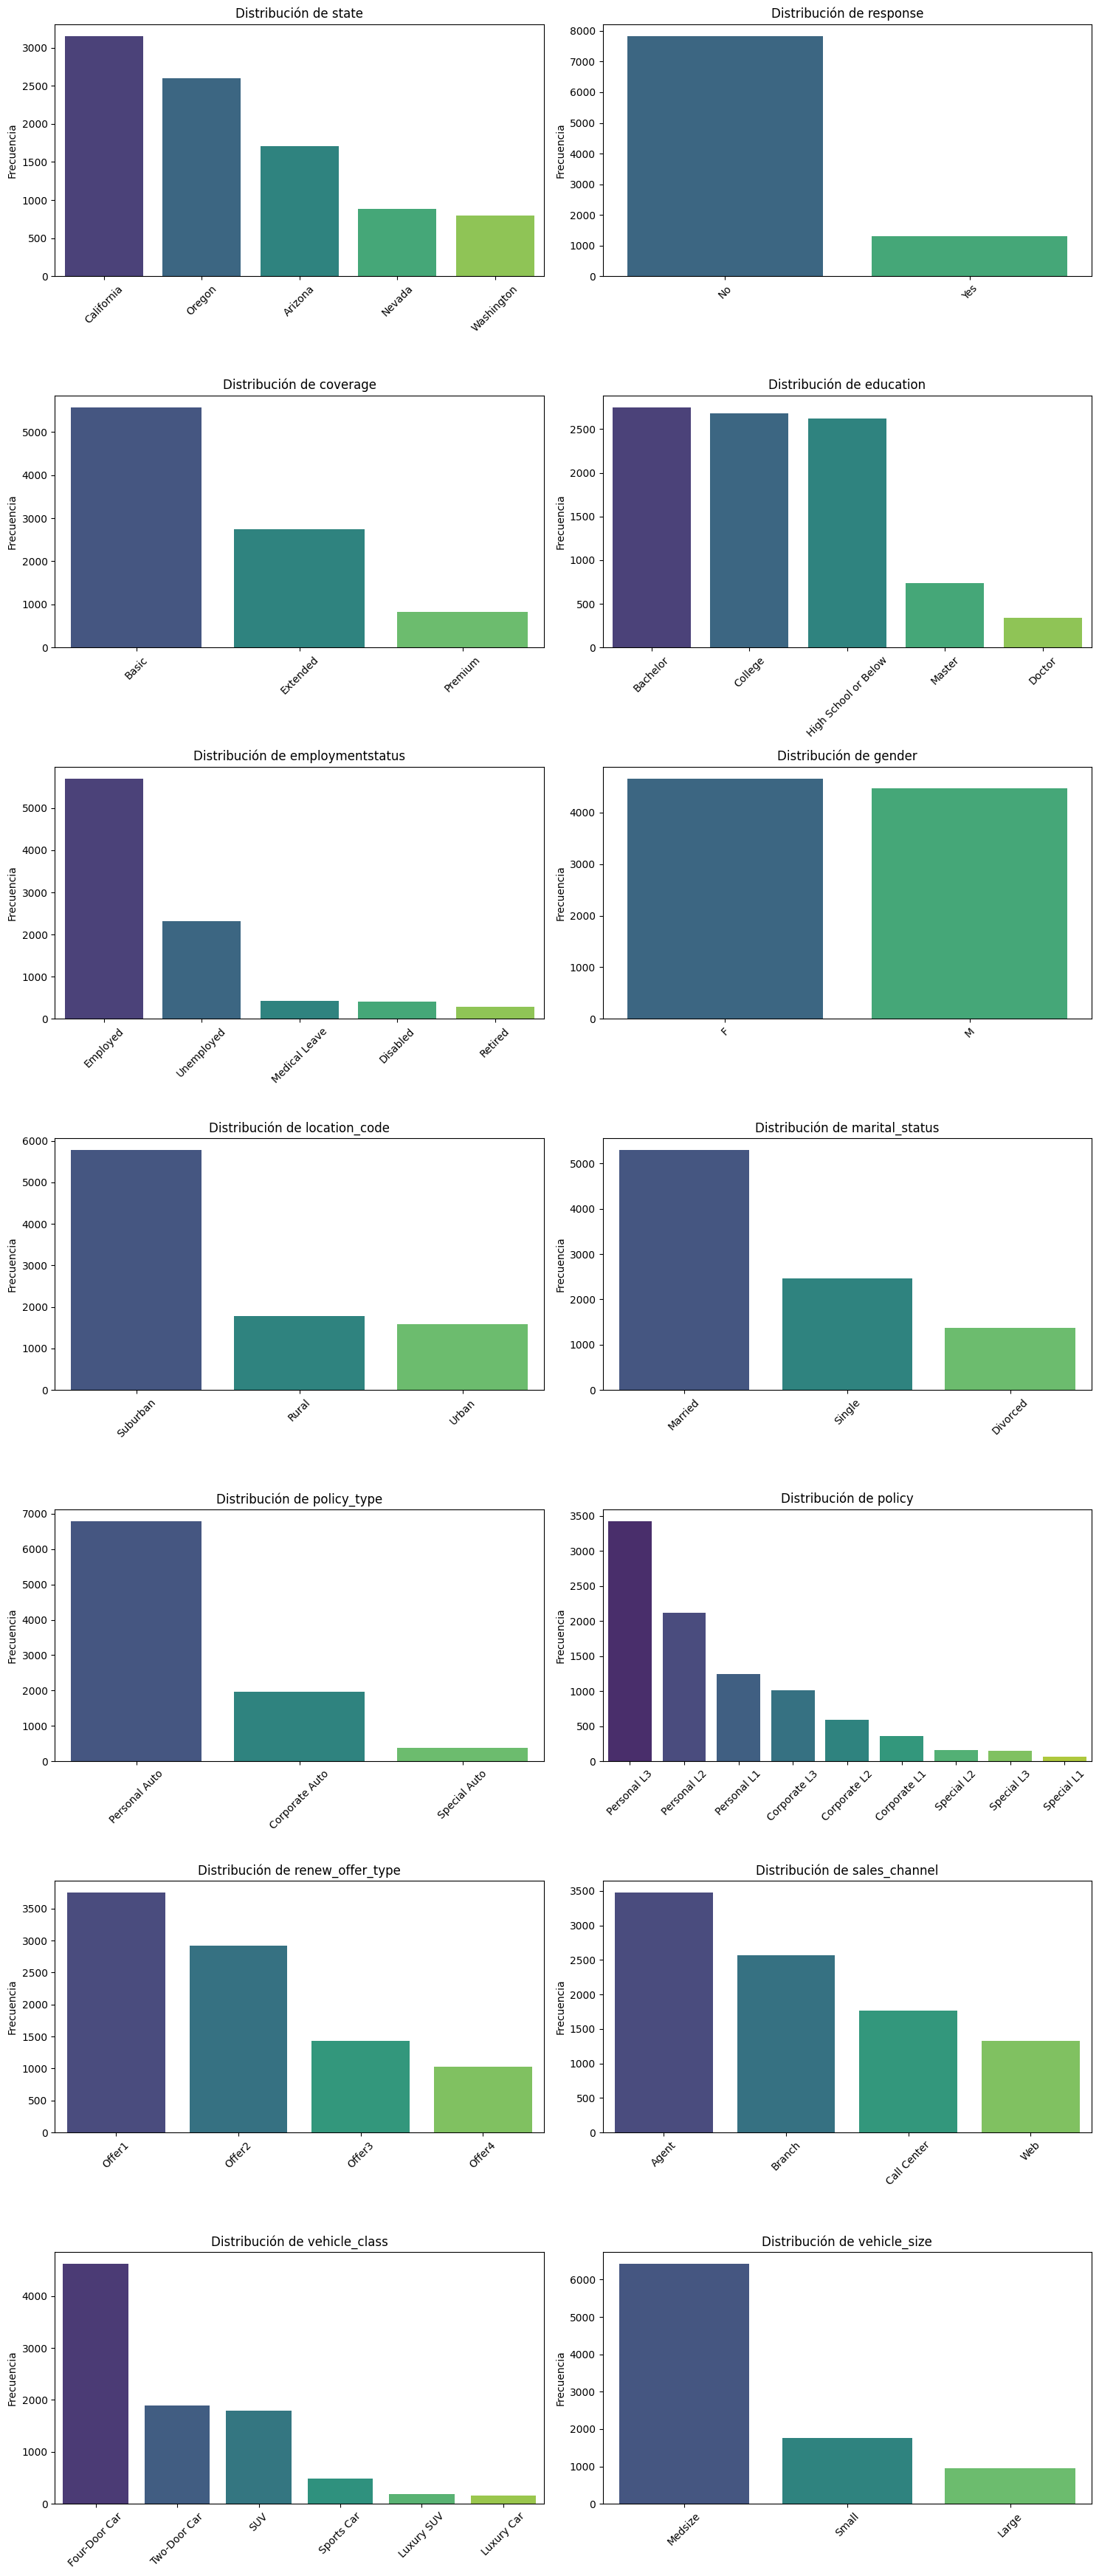

In [6]:
pinta_distribucion_categoricas(df_seguros, categoricas_seguros)

Aquí ya es más visual y se pueden ver más cosas (siempre lo que destaque, lo que sobresalga y lo que no):

* Response que es una de las importantes, hay una importante diferencia entre No y Yes en favor del No. Claramente ya tenemos un punto destacado: Tenemos un claro desbalanceo en la respuesta a nuestras campañas de marketing ¿es aceptable?¿está en línea con el mercado?
* California y Oregon son los estados con más clientes, ¿son los estados con mayor CLV por cliente?¿como son las respuestas en dichos estados? 
* Claramente dominan los clientes con 4-puertas, ¿qué representa en términos de CLV, se mantiene esa dominancia?

Y luego seguiría analizando en orden descendente según la importancia que establecimos en los primeros pasos, probablemente centrándome en las demográficas porque así lo pidieron desde dirección e importante relacionandolo con nuestras variables directoras o target.

Antes de seguir, observa que con esas escalas a veces es difícil estudiar o comparar los valores entre sí... Por eso la recomendación es pasar a frecuencias relativas, pero antes apliquemos todo lo anterior a nuestro segundo caso.

#### Caso 2. Viajes: Frecuencias absolutas

Primero en modo dejarse la vista:

In [10]:
for catego in variables_categoricas_viajes:
    print(f"Para {catego}")
    print(df_air_jun[catego].value_counts())
    print("\n*2")

Para aircompany
aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

*2
Para origen
origen
Bali           87
Ginebra        85
Nueva York     71
Cincinnati     70
Londres        63
París          48
Melbourne      47
Los Angeles    45
Roma           37
Cádiz          29
Barcelona      18
Name: count, dtype: int64

*2
Para destino
destino
Ginebra        82
Cincinnati     78
Bali           66
Londres        63
París          63
Nueva York     63
Roma           53
Melbourne      43
Los Angeles    40
Cádiz          35
Barcelona      14
Name: count, dtype: int64

*2
Para avion
avion
Boeing 747     183
Airbus A380    165
Boeing 737     151
Airbus A320    101
Name: count, dtype: int64

*2
Para con_escala
con_escala
False    396
True     204
Name: count, dtype: int64

*2


Y hagamos el análisis sobre la presentación visual

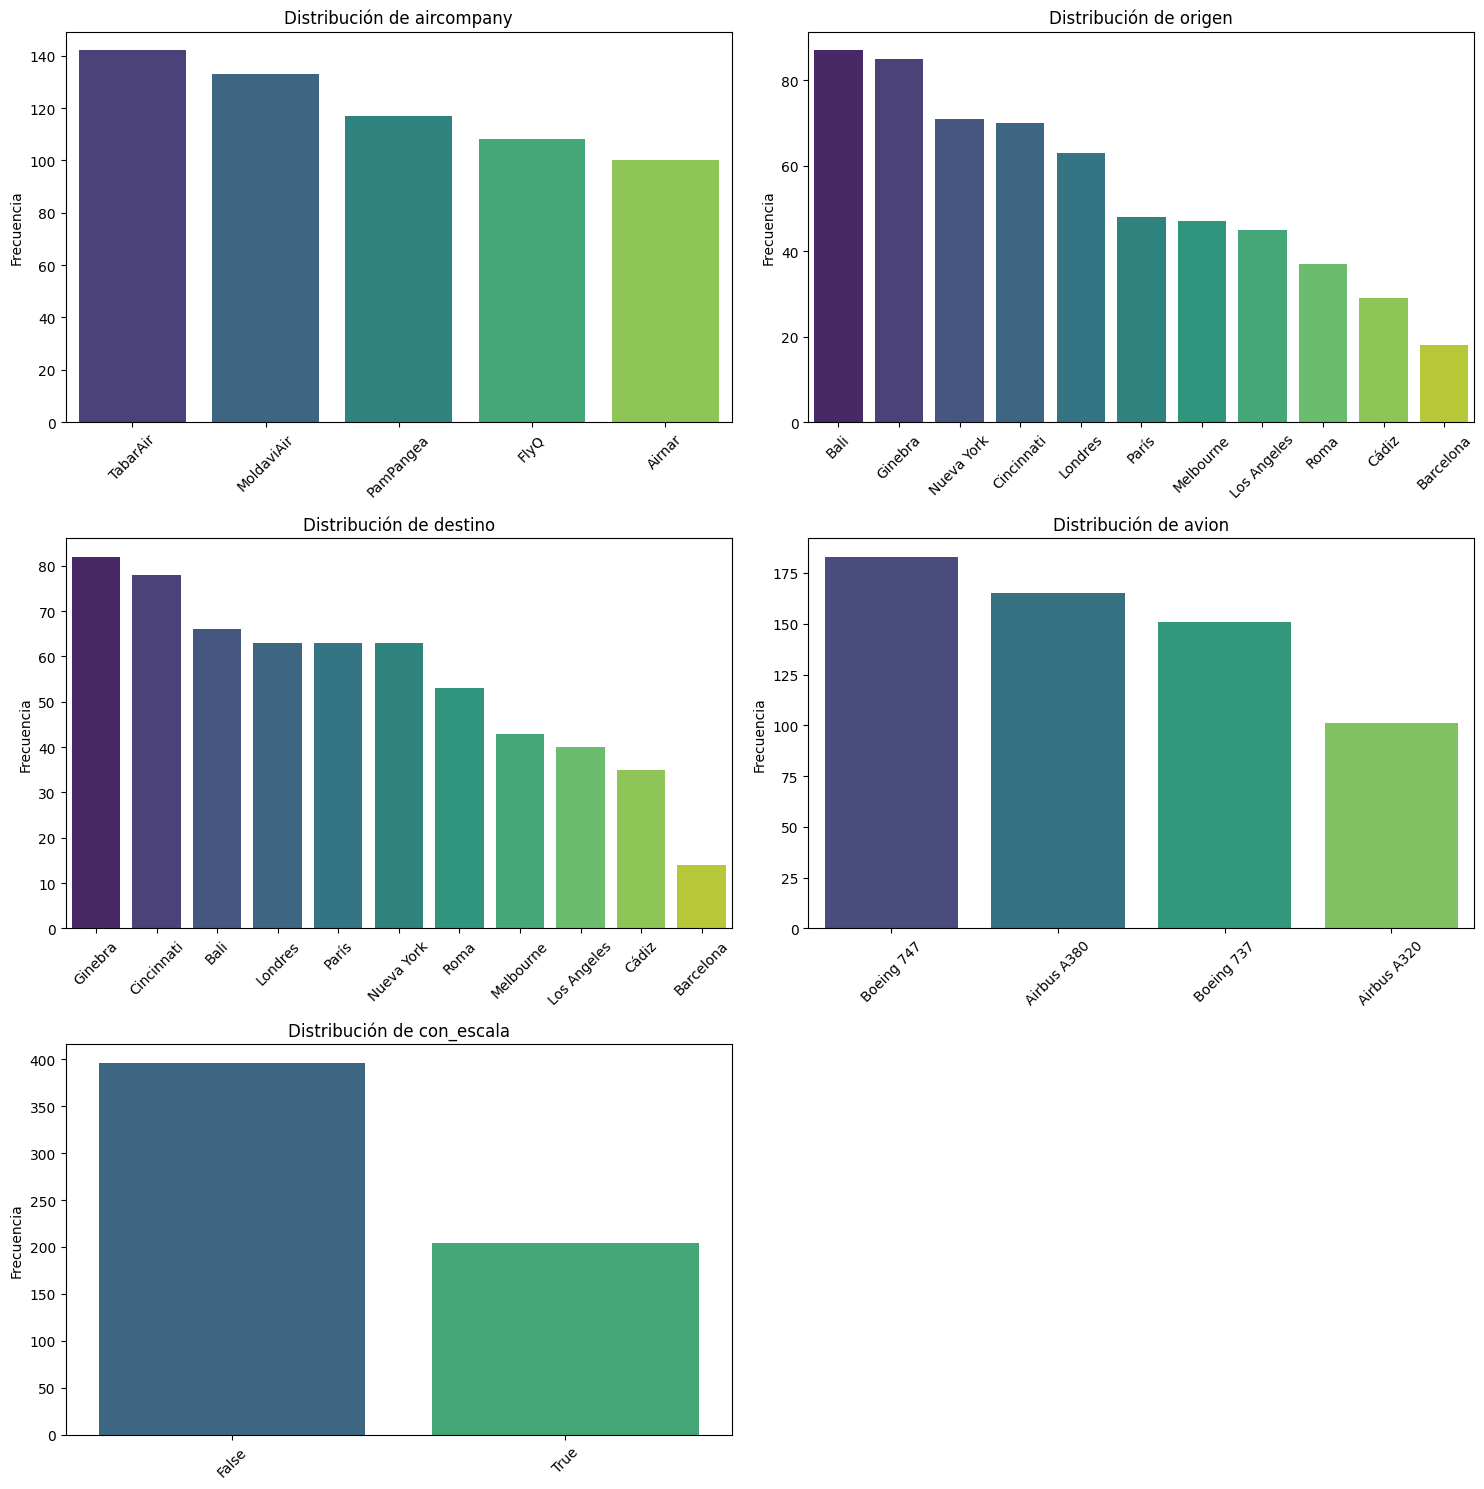

In [11]:
pinta_distribucion_categoricas(df_air_jun, variables_categoricas_viajes)

Así rápidamentes ya podríamos destacar:
* Barcelona como origen y destino infrautilizado, ¿podríamos sugerir aumentar el número de vuelos aquí? ¿por qué no lo hemos hecho ya? ¿Qué rentabilidad tiene este destino?¿Qué consumo? (Asociarlo a nuestras variables importantes)
* El Airbus 320 es el avión con menos utilización. ¿Qué ingresos tiene?¿Qué consumo?
* Airnar es la compañía con menor número de vuelos, TabarAir parece dominar. ¿Se mantiene este liderazgo proporcionalmente a los ingresos?¿Y al consumo?

Además de ver lo destacado, lo tenemos que ligar con nuestras variables directoras o targets. (Suponiendo que nos gusten esas que elegimos al principio)

### Frecuencia Relativa

Igualmente también podemos calcular la **frecuencia relativa** de cada conteo con respecto al total de valores de la muestra, de esta manera comprobamos la proporción de cada valor, lo que muchas veces facilita las comparaciones.

#### Caso 1. Seguros: Frecuencia relativa


In [13]:
for catego in categoricas_seguros:
    print(f"Para {catego}")
    print(df_seguros[catego].value_counts()/len(df_seguros)*100)
    print("\n*2")

Para state
state
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: count, dtype: float64

*2
Para response
response
No     85.679877
Yes    14.320123
Name: count, dtype: float64

*2
Para coverage
coverage
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: count, dtype: float64

*2
Para education
education
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: count, dtype: float64

*2
Para employmentstatus
employmentstatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: count, dtype: float64

*2
Para gender
gender
F    50.996278
M    49.003722
Name: count, dtype: float64

*2
Para location_code
location_code
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: co

Y como antes, es mejor visualizar (aunque en este caso tener los número es interesante):


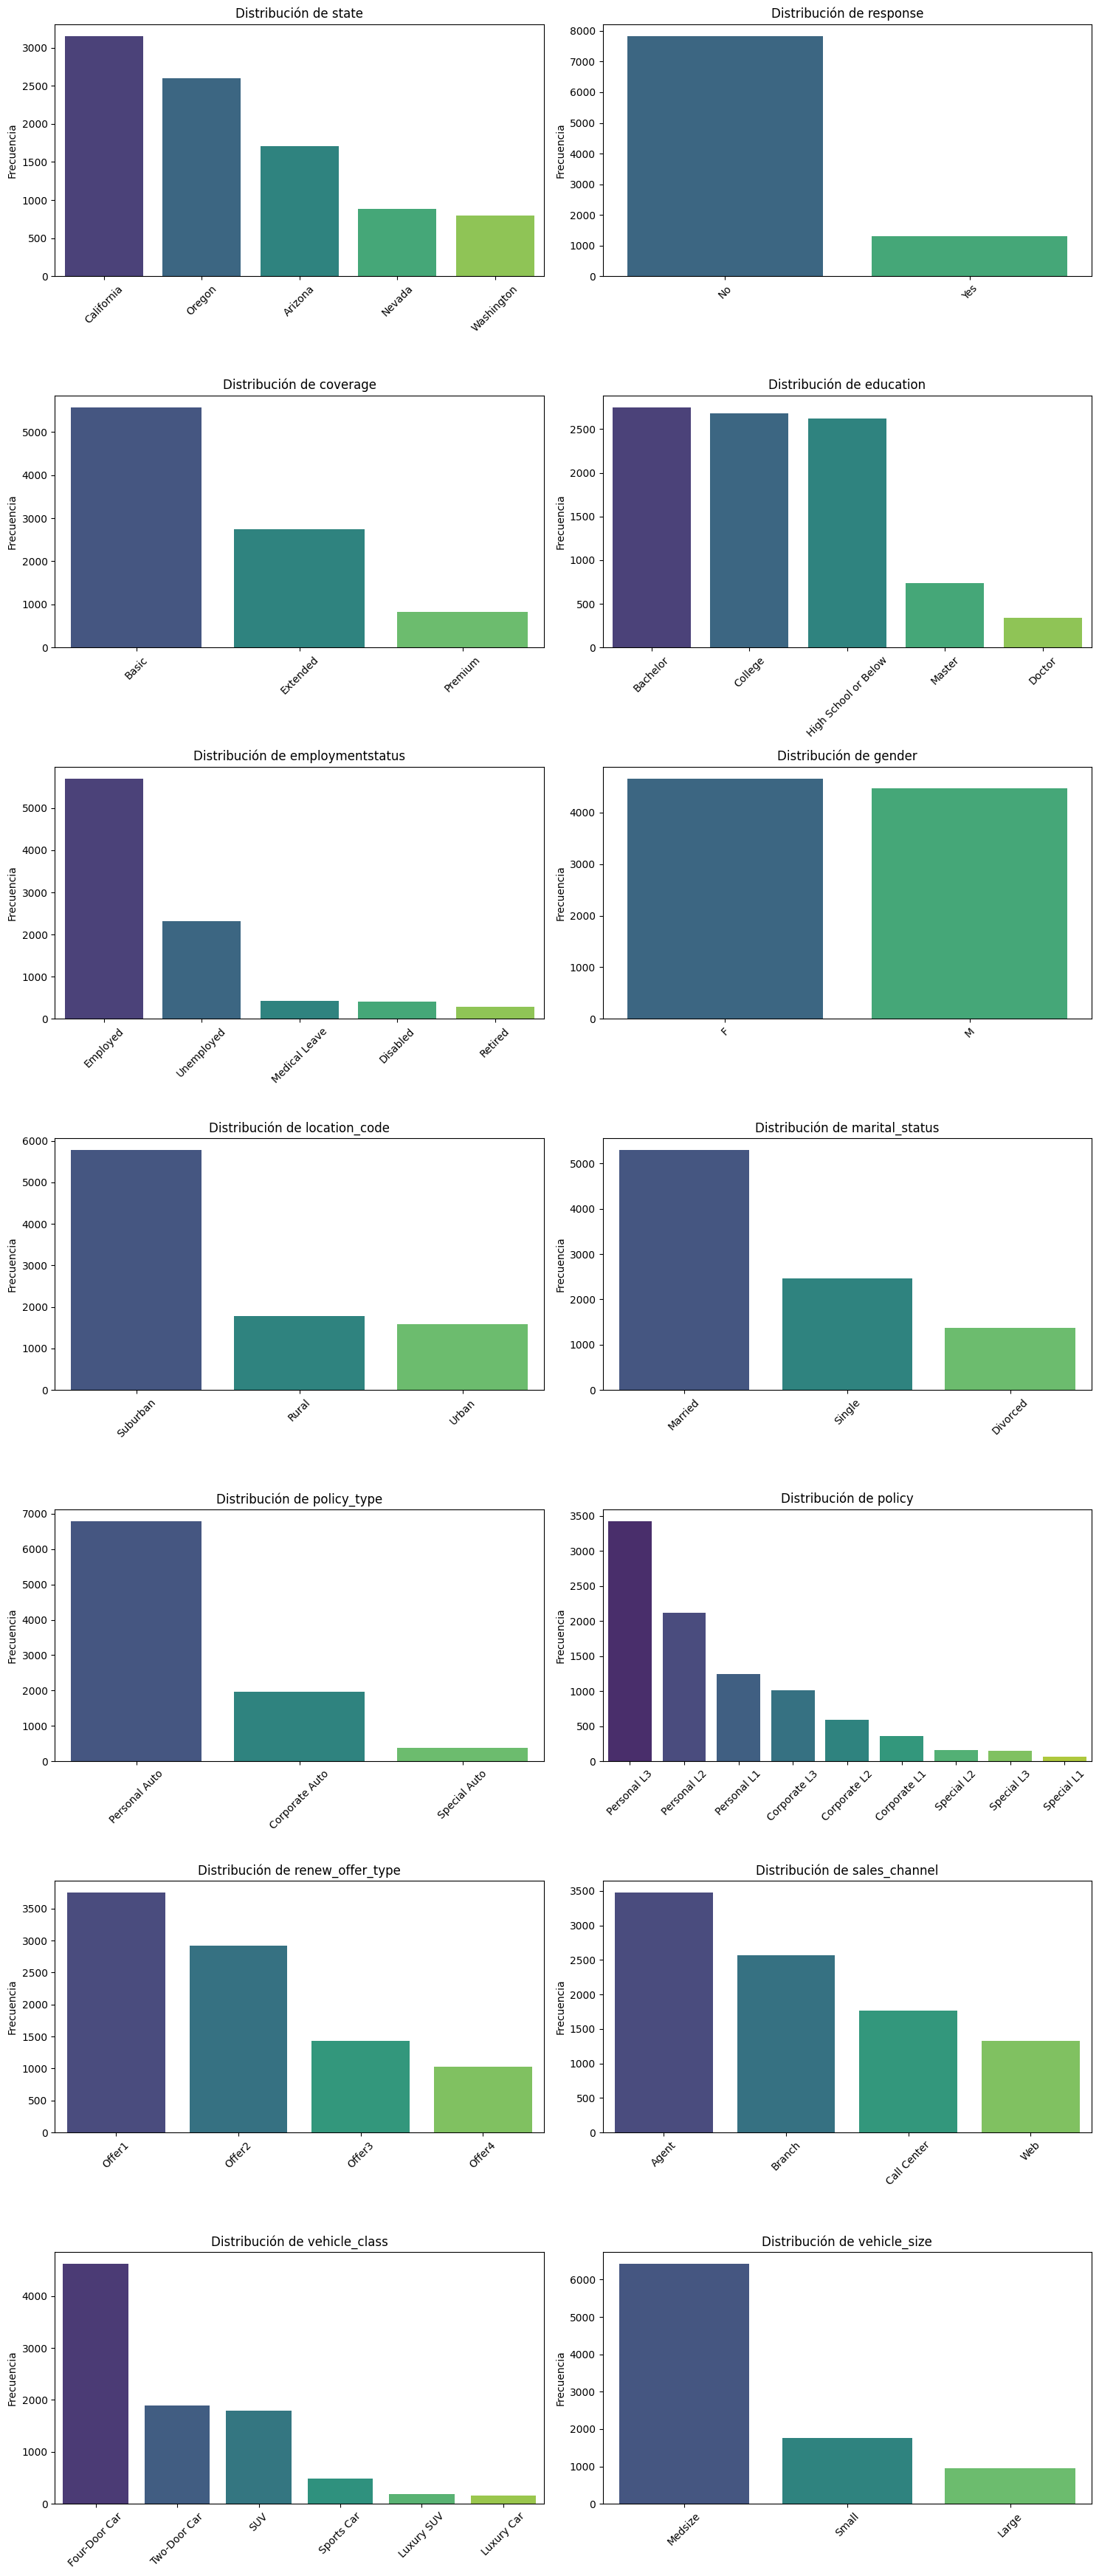

In [14]:
pinta_distribucion_categoricas(df_seguros, categoricas_seguros)

Observa las gráficas e intentar hacer una pequeña lista de cosas que sería interesante investigar al hilo de las preguntas que nos hicieron. Algunas de mis sugerencias:
* Respuesta, 14% vs 86%. ¿Qué segmento o conjunto de segmentos responde mejor?¿Qué segmento o conjunto de segmentos responde peor? ¿Que oferta es la mejor "atendida"? ¿Va en consonancia con la distribución de ofertas realizadas?
* Respuesta y CLV por Estado, respuesta y CLV por estado civil, respuesta y CLV por situación laboral. En estas tres hay una cierta dominancia, se mantiene en términos de CLV y respuesta (respuesta siempre hace referencia a la variable de respuesta a las campañas de renovación). A

#### Caso 2. Viajes: Frecuencia relativa


Para terminar, te dejo aquí repetido el ejercicio para el dataset de viajes, con mis conclusiones, revísalo y comprueba si te surgen otras o no te convencen las mías. [En la siguiente píldora empezaremos con las diversas formas de ver la dispersión y/o distribución de valores pero en el caso de variables numéricas]

In [12]:
for catego in categoricas_seguros:
    print(f"Para {catego}")
    print(df_seguros[catego].value_counts()/len(df_seguros)*100)
    print("\n*2")


Para state
state
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: count, dtype: float64

*2
Para response
response
No     85.679877
Yes    14.320123
Name: count, dtype: float64

*2
Para coverage
coverage
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: count, dtype: float64

*2
Para education
education
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: count, dtype: float64

*2
Para employmentstatus
employmentstatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: count, dtype: float64

*2
Para gender
gender
F    50.996278
M    49.003722
Name: count, dtype: float64

*2
Para location_code
location_code
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: co

Desde la perspectiva visual:

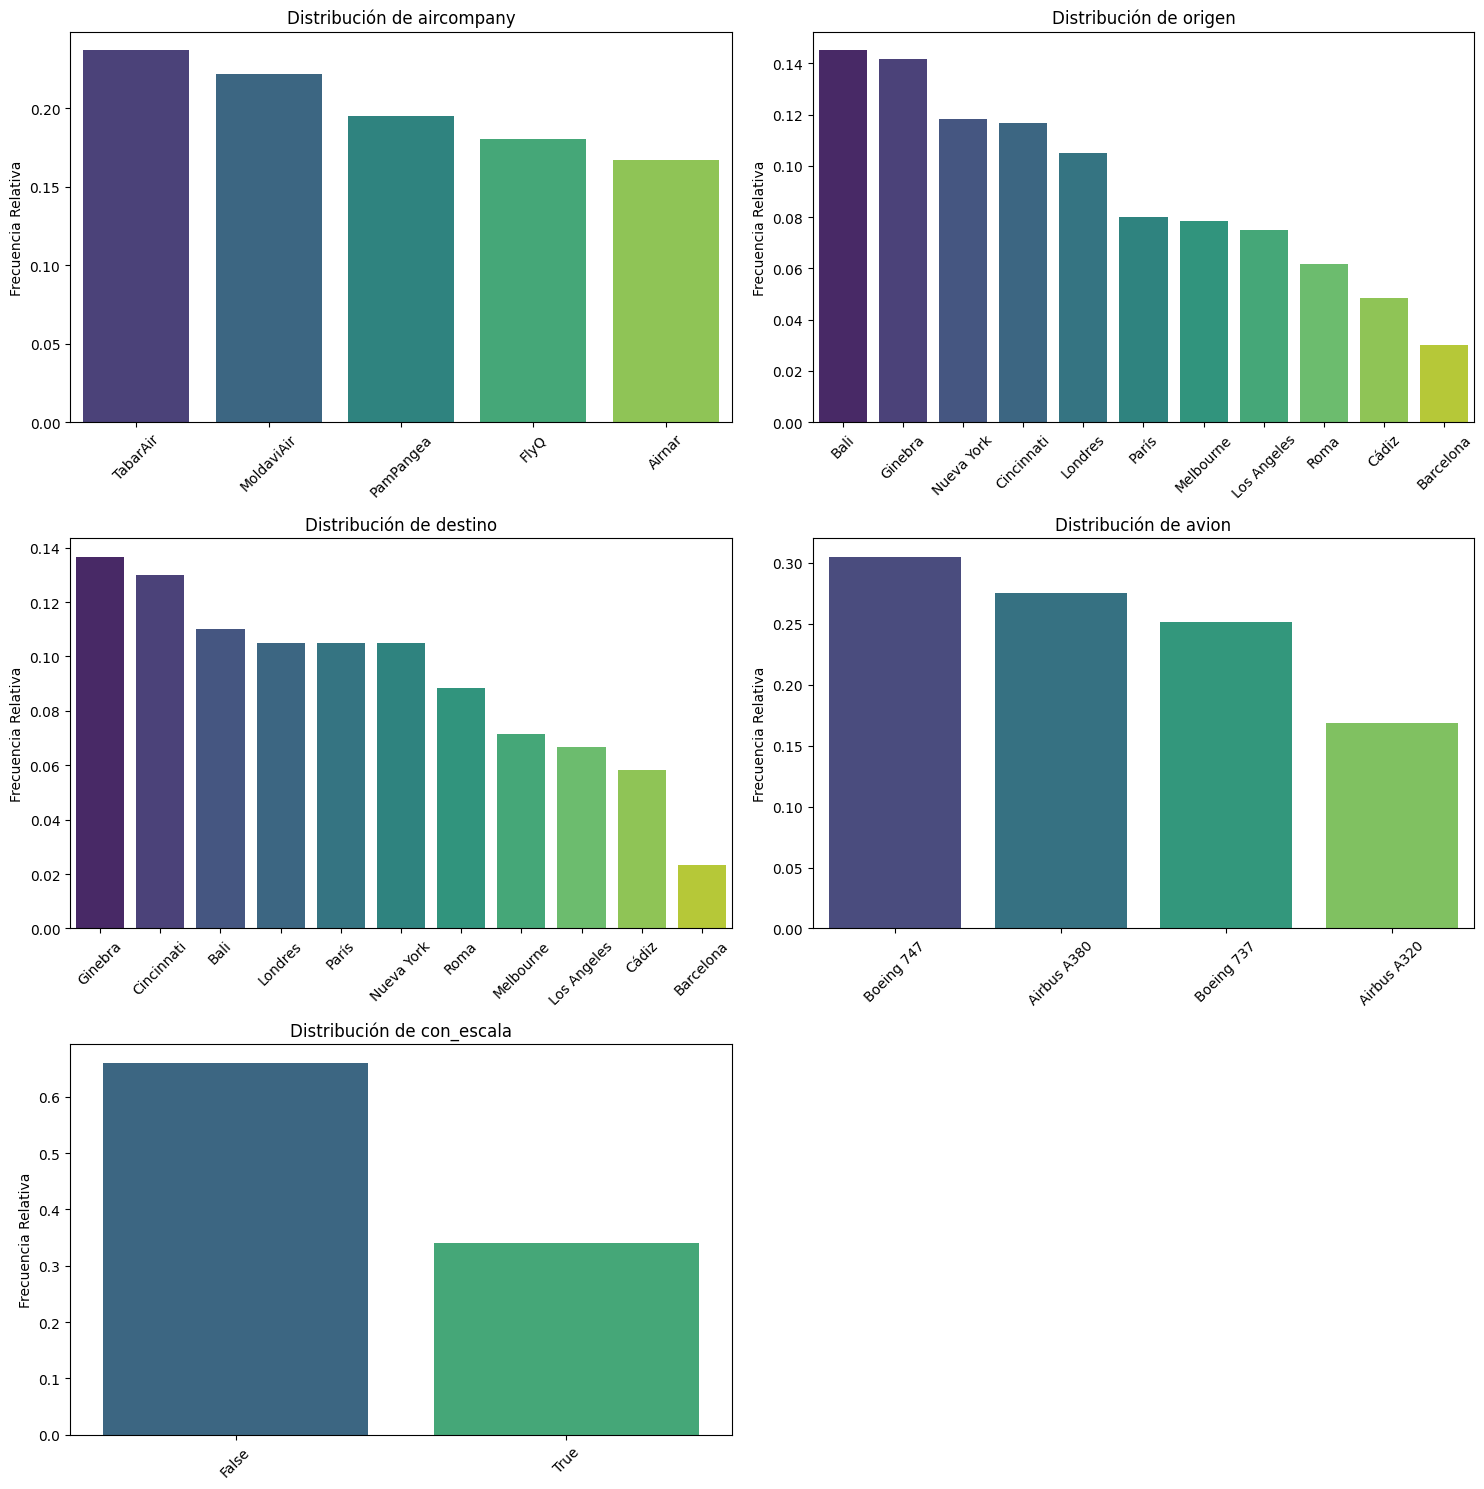

In [16]:
pinta_distribucion_categoricas(df_air_jun, variables_categoricas_viajes, relativa=True)

Preguntas para el análisis multivariante/bivariante, en general repetidas a las de las frecuencias absolutas:
* ¿Cómo es la proporción de ingresos y consumo por compañía comparada con su distribución en viajes? Es alguna empresa más rentable que otra en términos relativos (hace menos viajes pero ingresa más por viaje o consume menos)
* ¿Mantienen Bali y Ginebra su proporción en ingresos frente a Barcelona, por ejemplo, como la que se muestra en viajes a y desde? (Casi 30 veces más)
* ¿Cómo es la distribución de ingresos y consumo por avión? Justifica esa diferencia en el uso o hay otras razones. 
...
